In [1]:
# Import necessary libraries
import pandas as pd
import numpy as nps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import holidays
import requests
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Step 2: Data Collection

# Load the sales, customer, and store datasets
sales = pd.read_csv('/Users/sujitkandala/Downloads/Datasets/sales.csv')
customer = pd.read_csv('/Users/sujitkandala/Downloads/Datasets/customer.csv')
store = pd.read_csv('/Users/sujitkandala/Downloads/Datasets/store.csv')

In [3]:
# Preview the sales dataset
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Preview the customer dataset
customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Preview the store dataset
store.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [6]:
# Drop unncessary columns before merging the datasets

# Drop unnecessary columns from Sales Data
sales_data = sales.drop(columns=['Gender', 'Age'])

# Drop unnecessary columns from Customers Data
customers_data = customer.drop(columns=[ 'Category','Purchase Amount (USD)','Size', 'Color', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method'])

# Drop unnecessary columns from Stores Data
stores_data = store.drop(columns=['Product ID', 'Region','Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price','Discount', 'Holiday/Promotion', 'Competitor Pricing'])



In [7]:
# Verify the dataset columns

print("Sales Data Columns:\n", sales_data.columns)
print("Customer Data Columns:\n", customers_data.columns)
print("Store Data Columns:\n", stores_data.columns)


Sales Data Columns:
 Index(['Transaction ID', 'Date', 'Customer ID', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')
Customer Data Columns:
 Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Location', 'Season',
       'Review Rating', 'Discount Applied', 'Frequency of Purchases'],
      dtype='object')
Store Data Columns:
 Index(['Date', 'Store ID', 'Category', 'Weather Condition', 'Seasonality'], dtype='object')


In [8]:
# Merge sales_data with customers_data on 'Customer ID'

# Convert 'Customer ID' in Customer Data to string and add prefix 'CUST' (to match the 'Customer ID' in Sales Data)
customers_data['Customer ID'] = customers_data['Customer ID'].apply(lambda x: f"CUST{str(x).zfill(3)}")

# Merge Sales and Customer Data on 'Customer ID'
merged_sales_customer = pd.merge(sales_data, customers_data, on='Customer ID', how='inner')

# Verify the merged dataset
print("Merged Data Sample:\n", merged_sales_customer.head())

Merged Data Sample:
    Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  Age Gender Item Purchased       Location  \
0              50           150   55   Male         Blouse       Kentucky   
1             500          1000   19   Male        Sweater          Maine   
2              30            30   50   Male          Jeans  Massachusetts   
3             500           500   21   Male        Sandals   Rhode Island   
4              50           100   45   Male         Blouse         Oregon   

   Season  Review Rating Discount Applied Frequency of Purchases  
0  Winter       

In [9]:
# Merge merged_sales_data and store_data on 'Date' and 'Season'

# Replace 'Fall' with 'Autumn' in merged_sales_customer (to match the 'Seasonality' in store)
merged_sales_customer['Season'] = merged_sales_customer['Season'].replace({'Fall': 'Autumn'})

# Merge the Sales and Customer data with Store Data on 'Store ID' and 'Season'
final_data = pd.merge(merged_sales_customer, stores_data, 
                              left_on=['Date', 'Season'], 
                              right_on=['Date', 'Seasonality'], 
                              how='inner')

# Verify the final merged dataset
print("Final Merged Dataset:\n", final_data.head())

Final Merged Dataset:
    Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               1  2023-11-24     CUST001           Beauty         3   
2               1  2023-11-24     CUST001           Beauty         3   
3               1  2023-11-24     CUST001           Beauty         3   
4               1  2023-11-24     CUST001           Beauty         3   

   Price per Unit  Total Amount  Age Gender Item Purchased  Location  Season  \
0              50           150   55   Male         Blouse  Kentucky  Winter   
1              50           150   55   Male         Blouse  Kentucky  Winter   
2              50           150   55   Male         Blouse  Kentucky  Winter   
3              50           150   55   Male         Blouse  Kentucky  Winter   
4              50           150   55   Male         Blouse  Kentucky  Winter   

   Review Rating Discount Applied Frequency of Purchases Store 

In [10]:
# Check for summary of a DataFrame
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24881 entries, 0 to 24880
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          24881 non-null  int64  
 1   Date                    24881 non-null  object 
 2   Customer ID             24881 non-null  object 
 3   Product Category        24881 non-null  object 
 4   Quantity                24881 non-null  int64  
 5   Price per Unit          24881 non-null  int64  
 6   Total Amount            24881 non-null  int64  
 7   Age                     24881 non-null  int64  
 8   Gender                  24881 non-null  object 
 9   Item Purchased          24881 non-null  object 
 10  Location                24881 non-null  object 
 11  Season                  24881 non-null  object 
 12  Review Rating           24881 non-null  float64
 13  Discount Applied        24881 non-null  object 
 14  Frequency of Purchases  24881 non-null

In [11]:
# Merging with external data (holiday calendar for sales impact analysis)

# Define the years for the analysis
years = [2023, 2024] 

# Initialize the US holidays
us_holidays = holidays.US(years=years)

# Add a column to the final dataset indicating whether a date is a holiday
final_data['is_holiday'] = final_data['Date'].apply(lambda x: x in us_holidays)

# Add a column with the holiday name
final_data['holiday_name'] = final_data['Date'].apply(lambda x: us_holidays.get(x, 'No Holiday'))

# Verify the final dataset with holiday data
print(final_data[['Date', 'is_holiday', 'holiday_name']].head())

         Date  is_holiday holiday_name
0  2023-11-24       False   No Holiday
1  2023-11-24       False   No Holiday
2  2023-11-24       False   No Holiday
3  2023-11-24       False   No Holiday
4  2023-11-24       False   No Holiday


In [12]:
# Check for top 5 rows
final_data.head()

,Transaction ID,Date,Customer ID,Product Category,Quantity,Price per Unit,Total Amount,Age,Gender,Item Purchased,...,Season,Review Rating,Discount Applied,Frequency of Purchases,Store ID,Category,Weather Condition,Seasonality,is_holiday,holiday_name
0,1,2023-11-24,CUST001,Beauty,3,50,150,55,Male,Blouse,...,Winter,3.1,Yes,Fortnightly,S001,Groceries,Rainy,Winter,False,No Holiday
1,1,2023-11-24,CUST001,Beauty,3,50,150,55,Male,Blouse,...,Winter,3.1,Yes,Fortnightly,S001,Groceries,Sunny,Winter,False,No Holiday
2,1,2023-11-24,CUST001,Beauty,3,50,150,55,Male,Blouse,...,Winter,3.1,Yes,Fortnightly,S001,Groceries,Rainy,Winter,False,No Holiday
3,1,2023-11-24,CUST001,Beauty,3,50,150,55,Male,Blouse,...,Winter,3.1,Yes,Fortnightly,S001,Toys,Snowy,Winter,False,No Holiday
4,1,2023-11-24,CUST001,Beauty,3,50,150,55,Male,Blouse,...,Winter,3.1,Yes,Fortnightly,S002,Clothing,Cloudy,Winter,False,No Holiday


In [13]:
# Check for columns
final_data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount', 'Age', 'Gender', 'Item Purchased',
       'Location', 'Season', 'Review Rating', 'Discount Applied',
       'Frequency of Purchases', 'Store ID', 'Category', 'Weather Condition',
       'Seasonality', 'is_holiday', 'holiday_name'],
      dtype='object')

In [14]:
# Step 3: Data Preprocessing

# Check for missing values
print("Missing Values:\n", final_data.isnull().sum())

Missing Values:
 Transaction ID            0
Date                      0
Customer ID               0
Product Category          0
Quantity                  0
Price per Unit            0
Total Amount              0
Age                       0
Gender                    0
Item Purchased            0
Location                  0
Season                    0
Review Rating             0
Discount Applied          0
Frequency of Purchases    0
Store ID                  0
Category                  0
Weather Condition         0
Seasonality               0
is_holiday                0
holiday_name              0
dtype: int64


In [15]:
# Check for duplicate rows in the dataset
duplicate_rows = final_data[final_data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Remove duplicates
final_data = final_data.drop_duplicates()

# # Check for duplicate rows in the dataset (after removing duplicates)
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 2769
Number of duplicate rows: 2769


In [16]:
# Verify the data types to check inconsistent formats
print("Data Types After Formatting:\n", final_data.dtypes)

Data Types After Formatting:
 Transaction ID              int64
Date                       object
Customer ID                object
Product Category           object
Quantity                    int64
Price per Unit              int64
Total Amount                int64
Age                         int64
Gender                     object
Item Purchased             object
Location                   object
Season                     object
Review Rating             float64
Discount Applied           object
Frequency of Purchases     object
Store ID                   object
Category                   object
Weather Condition          object
Seasonality                object
is_holiday                   bool
holiday_name               object
dtype: object


In [17]:
# Normalize and clean Location and Demographical Data

# Standardize location names to Camel Case
final_data['Location'] = final_data['Location'].str.strip().str.title()

# Create age groups by binning the 'Age' column
final_data['Age Group'] = pd.cut(final_data['Age'], bins=[0, 18, 30, 40, 50, 60, 100], 
                                  labels=['<18', '18-30', '31-40', '41-50', '51-60', '>60'])

# Verify the new 'Age Group' column
print("Age Group Distribution:\n", final_data['Age Group'].value_counts())


Age Group Distribution:
 18-30    4915
41-50    4422
51-60    4274
31-40    4147
>60      4065
<18       289
Name: Age Group, dtype: int64


In [18]:
# Create new features

# Create a new feature 'holiday_sales_boost' that calculates sales boost during holidays
final_data['holiday_sales_boost'] = final_data['Total Amount'] * final_data['is_holiday'].astype(int)

# Verify the 'holiday_sales_boost' column
print("Holiday Sales Boost:\n", final_data[['Date', 'Total Amount', 'is_holiday', 'holiday_sales_boost']].head())


Holiday Sales Boost:
          Date  Total Amount  is_holiday  holiday_sales_boost
0  2023-11-24           150       False                    0
1  2023-11-24           150       False                    0
3  2023-11-24           150       False                    0
4  2023-11-24           150       False                    0
5  2023-11-24           150       False                    0


In [19]:
# Create a weather impact feature by mapping weather conditions to numerical values
weather_impact_map = {'Sunny': 1.1, 'Cloudy': 1.0, 'Rainy': 0.8, 'Snowy': 0.7}
final_data['weather_impact'] = final_data['Weather Condition'].map(weather_impact_map).fillna(1.0)  # Default to 1 (no impact)

# Verify the 'weather_impact' column
print("Weather Impact:\n", final_data[['Weather Condition', 'weather_impact']].head())

Weather Impact:
   Weather Condition  weather_impact
0             Rainy             0.8
1             Sunny             1.1
3             Snowy             0.7
4            Cloudy             1.0
5             Rainy             0.8


In [20]:
# Customer-level metrics

# 1. Average Spend: Calculate the average spend for each customer
customer_avg_spend = final_data.groupby('Customer ID')['Total Amount'].mean().reset_index()
customer_avg_spend.rename(columns={'Total Amount': 'Avg Spend'}, inplace=True)

# Merge the average spend back to the final dataset
final_data = pd.merge(final_data, customer_avg_spend, on='Customer ID', how='left')

# 2. Repeat Purchases: Count the number of repeat purchases for each customer
customer_repeat_purchases = final_data.groupby('Customer ID')['Transaction ID'].nunique().reset_index()
customer_repeat_purchases.rename(columns={'Transaction ID': 'Repeat Purchases'}, inplace=True)

# Merge repeat purchases back to the final dataset
final_data = pd.merge(final_data, customer_repeat_purchases, on='Customer ID', how='left')

# Verify the customer-level metrics
print("Customer-Level Metrics:\n", final_data[['Customer ID', 'Avg Spend', 'Repeat Purchases']].head())

Customer-Level Metrics:
   Customer ID  Avg Spend  Repeat Purchases
0     CUST001      150.0                 1
1     CUST001      150.0                 1
2     CUST001      150.0                 1
3     CUST001      150.0                 1
4     CUST001      150.0                 1


In [21]:
# Store-level metrics

# Group by 'Location' to calculate total sales per city
sales_by_city = final_data.groupby('Location')['Total Amount'].sum().reset_index()

# Sort by total sales in descending order
sales_by_city = sales_by_city.sort_values(by='Total Amount', ascending=False)

# Verify the sales by city
print("Sales by Location:\n", sales_by_city.head())

Sales by Location:
          Location  Total Amount
7        Delaware        425660
47  West Virginia        355425
20  Massachusetts        336480
35       Oklahoma        335390
31       New York        330255


In [22]:
# Step 4: Exploratory Data Analysis (EDA)

# Top-performing Products: Group by Product Category and sum the total sales
top_products = final_data.groupby('Product Category')['Total Amount'].sum().reset_index()
top_products = top_products.sort_values(by='Total Amount', ascending=False)

# Top-performing Stores: Group by Store ID and sum the total sales
top_stores = final_data.groupby('Store ID')['Total Amount'].sum().reset_index()
top_stores = top_stores.sort_values(by='Total Amount', ascending=False)

# Verify top-performing products and stores
print("Top Products:\n", top_products.head())
print("Top Stores:\n", top_stores.head())

Top Products:
   Product Category  Total Amount
1         Clothing       3533220
2      Electronics       3497140
0           Beauty       3260035
Top Stores:
   Store ID  Total Amount
2     S003       2079900
1     S002       2064900
3     S004       2059075
0     S001       2054915
4     S005       2031605


In [23]:
# Analyze Customer Segmentation

# High Spenders: Segment customers based on total spend
high_spenders = final_data.groupby('Customer ID')['Total Amount'].sum().reset_index()
high_spenders = high_spenders.sort_values(by='Total Amount', ascending=False)

# Frequent Buyers: Segment customers based on frequency of purchases (assuming 'Frequency of Purchases' is categorical)
frequent_buyers = final_data.groupby('Customer ID')['Transaction ID'].nunique().reset_index()
frequent_buyers = frequent_buyers.sort_values(by='Transaction ID', ascending=False)

# Verify customer segmentation
print("High Spenders:\n", high_spenders.head())
print("Frequent Buyers:\n", frequent_buyers.head())

High Spenders:
     Customer ID  Total Amount
342     CUST342         64000
970     CUST970         60000
73      CUST074         58000
109     CUST109         56000
561     CUST561         56000
Frequent Buyers:
     Customer ID  Transaction ID
0       CUST001               1
671     CUST671               1
658     CUST658               1
659     CUST659               1
660     CUST660               1


In [24]:
# Examine Correlations Between Sales and External Factors

# Sales and Weather Correlation: Group by weather condition and sum the sales
weather_sales = final_data.groupby('Weather Condition')['Total Amount'].sum().reset_index()

# Sales during Holidays vs Non-Holidays
holiday_sales = final_data.groupby('is_holiday')['Total Amount'].sum().reset_index()

# Verify correlation results
print("Sales by Weather Condition:\n", weather_sales)
print("Sales during Holidays vs Non-Holidays:\n", holiday_sales)


Sales by Weather Condition:
   Weather Condition  Total Amount
0            Cloudy       2525420
1             Rainy       2526795
2             Snowy       2632910
3             Sunny       2605270
Sales during Holidays vs Non-Holidays:
    is_holiday  Total Amount
0       False       9802500
1        True        487895


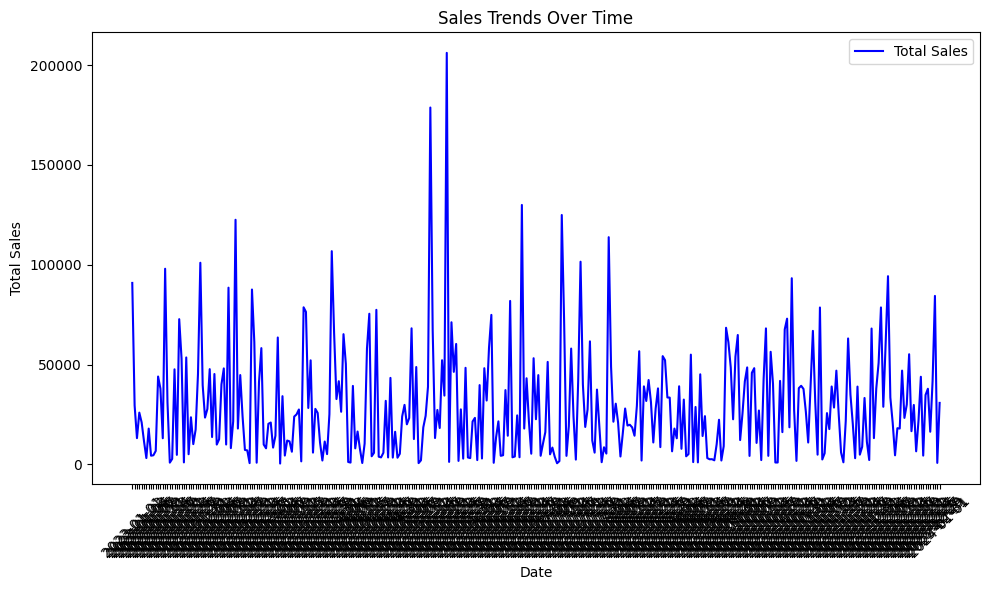

In [25]:
# Visualizing Insights

# Time series for trends

# Group by Date to calculate total sales over time
sales_trends = final_data.groupby('Date')['Total Amount'].sum().reset_index()

# Plot Time Series for Sales Trends
plt.figure(figsize=(10, 6))
plt.plot(sales_trends['Date'], sales_trends['Total Amount'], label='Total Sales', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


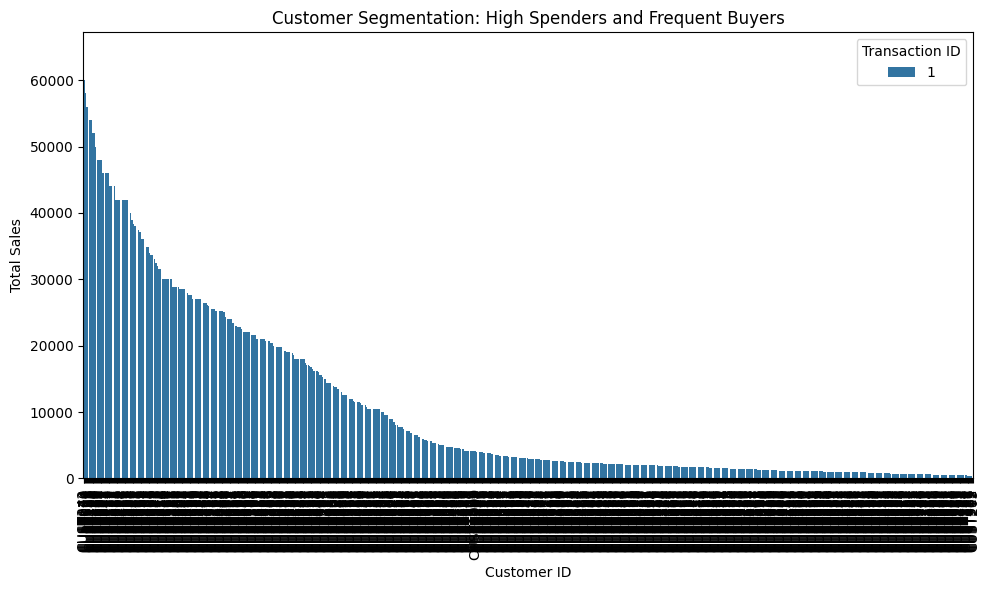

In [26]:
# Clustered Bar Chart for Customer Segmentation

# Create a combined DataFrame for high spenders and frequent buyers
segmentation = high_spenders.merge(frequent_buyers, on='Customer ID', how='inner')

# Create a Clustered Bar Chart for Customer Segmentation
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer ID', y='Total Amount', data=segmentation, hue='Transaction ID')
plt.title('Customer Segmentation: High Spenders and Frequent Buyers')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [27]:
# Correlation matrix

# Calculate correlation matrix for numerical columns
correlation_matrix = final_data[['Total Amount', 'Price per Unit', 'Quantity', 'Age', 'Review Rating', 'Discount Applied', 'weather_impact', 'holiday_sales_boost']].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                      Total Amount  Price per Unit  Quantity       Age  \
Total Amount             1.000000        0.852318  0.380285  0.003403   
Price per Unit           0.852318        1.000000  0.023128 -0.024515   
Quantity                 0.380285        0.023128  1.000000 -0.013827   
Age                      0.003403       -0.024515 -0.013827  1.000000   
Review Rating           -0.034088       -0.035683 -0.030550 -0.014122   
weather_impact          -0.007607       -0.006323 -0.000020  0.002819   
holiday_sales_boost      0.199080        0.151272  0.095645  0.052481   

                     Review Rating  weather_impact  holiday_sales_boost  
Total Amount             -0.034088       -0.007607             0.199080  
Price per Unit           -0.035683       -0.006323             0.151272  
Quantity                 -0.030550       -0.000020             0.095645  
Age                      -0.014122        0.002819             0.052481  
Review Rating           

In [28]:
# Step 5: Advanced Analysis

# Linear Regression to determine the relationship between variables

# Define features (independent variables) and target (dependent variable)
X = final_data[['Price per Unit', 'Quantity', 'Review Rating', 'weather_impact', 'holiday_sales_boost']]
y = final_data['Total Amount']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Output the coefficients of the regression model
print("Coefficients:\n", model.coef_)
print("Intercept:\n", model.intercept_)

Coefficients:
 [ 2.50017338e+00  1.78483150e+02  4.59826451e+00 -6.85574176e+00
  1.25933266e-01]
Intercept:
 -454.9687262945052


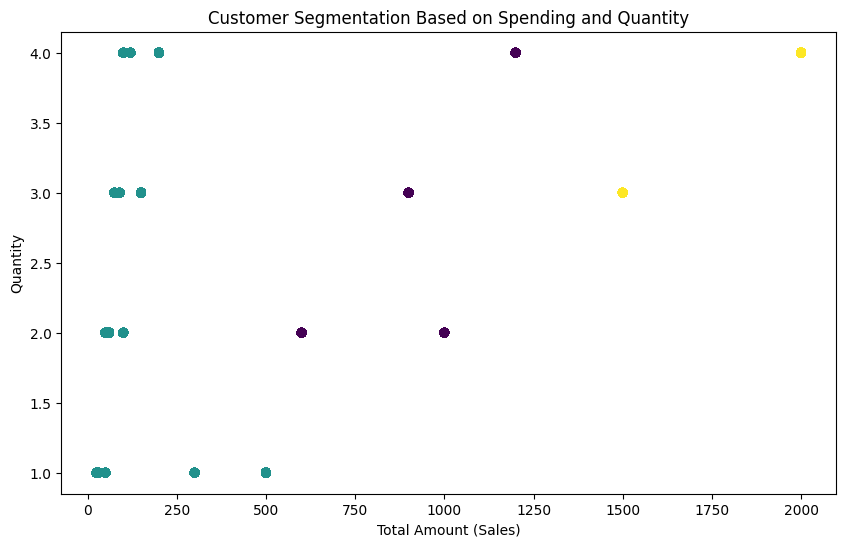

In [29]:
# Segment customers using clustering techniques (K-Means)

# Select relevant features for clustering
X = final_data[['Total Amount', 'Quantity', 'Review Rating']]

# Initialize KMeans model with 3 clusters (adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model and predict clusters
final_data['customer_segment'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(final_data['Total Amount'], final_data['Quantity'], c=final_data['customer_segment'], cmap='viridis')
plt.title("Customer Segmentation Based on Spending and Quantity")
plt.xlabel("Total Amount (Sales)")
plt.ylabel("Quantity")
plt.show()

In [30]:
# Low performing stores

# Identify stores with low sales
low_performing_stores = final_data.groupby('Store ID')['Total Amount'].sum().reset_index()
low_performing_stores = low_performing_stores.sort_values(by='Total Amount', ascending=True)

# Get top 5 low-performing stores
print("Low Performing Stores:\n", low_performing_stores.head())

Low Performing Stores:
   Store ID  Total Amount
4     S005       2031605
0     S001       2054915
3     S004       2059075
1     S002       2064900
2     S003       2079900


In [31]:
# Low performing products

# Identify products with low sales
low_performing_products = final_data.groupby('Product Category')['Total Amount'].sum().reset_index()
low_performing_products = low_performing_products.sort_values(by='Total Amount', ascending=True)

# Get top 5 low-performing products
print("Low Performing Products:\n", low_performing_products.head())

Low Performing Products:
   Product Category  Total Amount
0           Beauty       3260035
2      Electronics       3497140
1         Clothing       3533220


In [32]:
# Export the data for visualizations in Tableau
final_data.to_csv('/Users/sujitkandala/Downloads/Datasets/final_retail_analysis.csv', index=False)